In [1]:
import sys
import os

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(parent_dir)
sys.path.append(os.path.join(parent_dir, "src"))
# 경로를 재설정하여 상위 디렉토리의 src 디렉토리를 import 할 수 있도록 함

In [3]:
from utils.config import load_config
config = load_config()

In [4]:
from data_pipeline.dataloader import Dataloader
dataloader = Dataloader(config)
dataloader.setup()

augmenting:   0%|          | 0/9324 [00:00<?, ?it/s]

cleaning:   0%|          | 0/16529 [00:00<?, ?it/s]

tokenizing:   0%|          | 0/16529 [00:00<?, ?it/s]

cleaning:   0%|          | 0/550 [00:00<?, ?it/s]

tokenizing:   0%|          | 0/550 [00:00<?, ?it/s]

Dataset initialized with 16529 samples
Sample input: {'input_ids': [0, 15314, 2119, 2689, 2088, 8984, 2119, 1513, 2088, 11934, 3629, 16516, 6614, 2031, 19521, 2259, 4540, 2052, 4405, 2203, 2182, 97, 2, 8984, 2119, 1513, 2088, 16, 3784, 2119, 1513, 2088, 2070, 2044, 2119, 2689, 2203, 2182, 18, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
datalist = list(dataloader.train_dataset)
datalist_out = list(map(lambda x: round(x[1].item(), 1), datalist))

In [6]:
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import eda.exploration as eda
import numpy as np

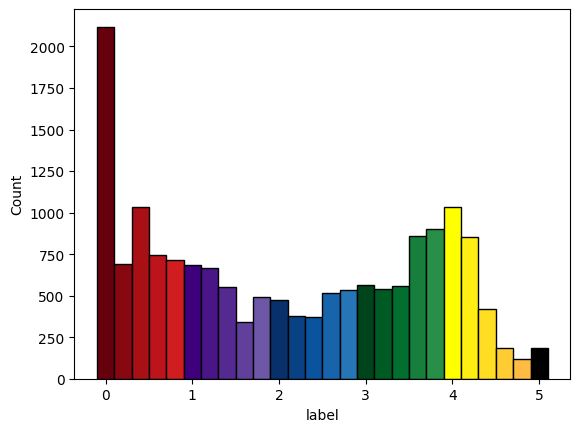

In [13]:
train_labels = pd.DataFrame(datalist_out, columns=["label"])
fig_labels = eda.vizLabel(train_labels)

In [8]:
dev_datalist = list(dataloader.val_dataset)
dev_datalist_out = list(map(lambda x: round(x[1].item(), 1), dev_datalist))
dev_labels = pd.DataFrame(dev_datalist_out, columns=["label"])

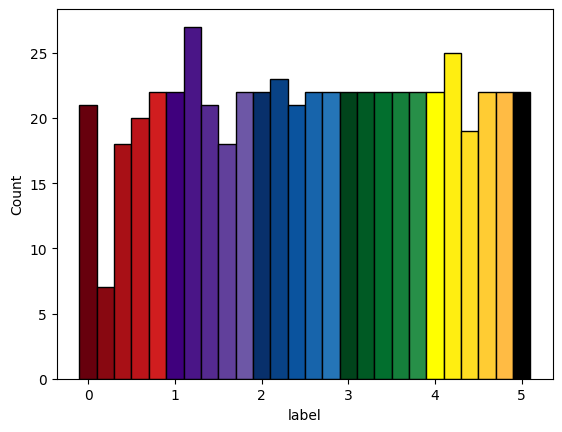

In [9]:
fig = eda.vizLabel(dev_labels)

여기까지 하니까 훈련 데이터셋이 많은 label일수록 잘 예측하는 경향이 있을까 궁금해졌습니다.  
그래서 `dev.ipynb` 파일을 참고해서 label로 그룹화해서 loss가 얼마나 나올지 계산해보겠습니다.  
가설: label 수의 분포와 반비례의 loss가 나타날 것 같다.

In [10]:
dev_predict = pd.read_csv('./output.csv')
dev_label = pd.read_csv('./data/dev.csv')
dev = pd.merge(dev_label, dev_predict, on='id')
dev['diff'] = abs(dev['label'] - dev['target'])

<Axes: xlabel='label_group', ylabel='diff'>

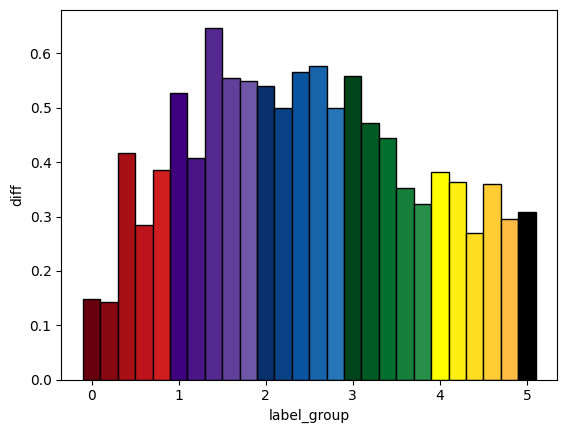

In [24]:
fig_loss = eda.vizL1LossForLabel(dev)

역시 label이 0인 데이터가 제일 많기 때문에 loss가 제일 낮게 찍히고 있는 걸 확인할 수 있었습니다.  
데이터가 상대적으로 많이 부족한 label이 4.2보다 큰 부분에서의 loss가 제일 높게 나올 줄 알았습니다.  
근데 의외로 그 쪽은 loss가 준수했고, label이 1.0 ~ 3.0 사이의 영역에서 loss가 제일 높게 나와서 의외였습니다.  